# Filtering by PCA

In [10]:
import glob
import numpy as np
import pandas as pd
from scipy.spatial.distance import squareform, pdist
from tmap.tda import Filter
from tmap.tda.metric import Metric
from tmap.tda.Filter import _filter_dict
from tmap.tda.utils import optimize_dbscan_eps
import plotly.graph_objs as go
from tmap.netx.SAFE import get_significant_nodes
from collections import Counter

In [11]:
# load up the OTU data and metadata

input_otu = pd.read_csv('table-with-taxonomy.tsv', sep='\t', header=0, index_col='#OTU ID')
input_otu.head()

,ERR475523,ERR475584,ERR475580,ERR475592,ERR475594,ERR475560,ERR475505,ERR475529,ERR475564,ERR475482,...,ERR475563,ERR475570,ERR475577,ERR475506,ERR475576,ERR475483,ERR475477,ERR475479,ERR475487,ERR475548
#OTU ID,,,,,,,,,,,,,,,,,,,,,
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__,41736,5034,759,4989,60,1518,9365,869,174,99,...,5691,2682,7147,1528,120,441,2328,706,119,1890
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus,34676,576,515,345,1511,597,379,883,2056,6039,...,13395,170,73,6636,83,944,312,206,296,12
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides,24292,28039,9699,67590,8546,2820,35789,1108,152,50,...,4217,5581,1120,903,55444,282,9028,1270,78,7952
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia,14194,9088,4226,12213,764,9920,4396,1826,11600,7563,...,24424,28403,3346,110102,1068,13781,1421,5061,5957,7750
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;__;__,10173,1959,219,1069,60,2888,1204,148,193,1250,...,1684,620,1179,151,260,90,1506,407,216,1079


In [12]:
metadata = pd.read_csv('16S_metadata_binary.tsv', sep='\t', header=0, index_col='Sample ID')
print(metadata.shape)
metadata.head()

(116, 2)


,Group,Gender
Sample ID,,
ERR475467,0,1
ERR475468,0,1
ERR475469,0,1
ERR475470,0,1
ERR475471,0,1


In [13]:
# the input_otu dataframe is in the wrong orientation for tmap
X = input_otu.T

In [14]:
# create a simple TDA network using recommended parmeters and no precomputed distance metric

from tmap.tda import mapper, Filter
from tmap.tda.cover import Cover
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Step1. initiate a Mapper
tm = mapper.Mapper(verbose=1)

# Step2. Projection
lens = [Filter.PCA(components=[0,1],random_state=100)]
projected_X = tm.filter(X, lens=lens)
eps = optimize_dbscan_eps(X, threshold=95)
clusterer = DBSCAN(eps=eps, min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)

graph_simple_PCA = tm.map(data=StandardScaler().fit_transform(X), cover=cover, clusterer=clusterer)

 48%|████▊     | 190/400 [00:00<00:00, 1803.92it/s]

Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.


100%|██████████| 400/400 [00:00<00:00, 2772.12it/s]


Mapping on data (116, 268) using lens (116, 2)
...minimal number of points in hypercube to do clustering: 1
...create 101 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 550 edges.
Finish TDA mapping



Graph
Contains 101 nodes and 116 samples
During constructing graph, 0 (100.0%) samples lost

Used params:

cluster params
algorithm: auto
eps: 76041.84946073355
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 1
n_jobs: None
p: None
cover params
r: 20
overlap: 0.75
lens params
lens_0:
components: [0, 1]
metric: none




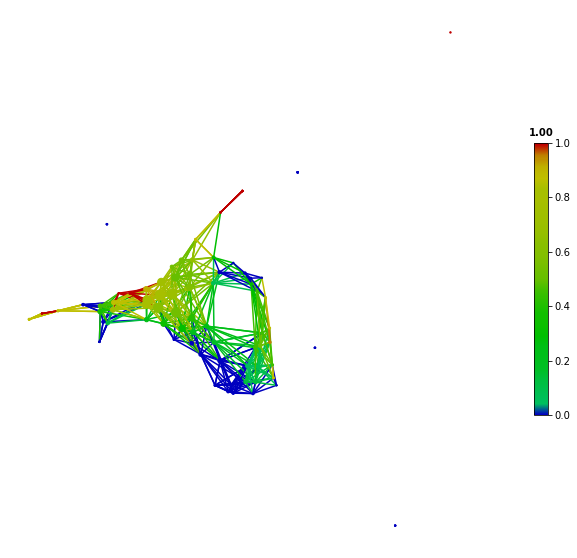

In [6]:
print(graph_simple_PCA.info())
# Targeting the groups (CRC vs Control) in the visualisation
# 1 being CRC and 0 being Control

from tmap.tda.plot import Color
color = Color(metadata.loc[:,'Group'],target_by='sample',dtype='numerical')
graph_simple_PCA.show(color=color)

In [19]:
# set up the distance matrix
dm = squareform(pdist(X,metric='braycurtis'))

# Step1. initiate a Mapper
tm = mapper.Mapper(verbose=1)

# Step2. Projection
metric = Metric(metric="precomputed")
lens = [Filter.PCA(components=[0,1], random_state=100)]
projected_X = tm.filter(dm, lens=lens)
eps = optimize_dbscan_eps(X, threshold=95)
clusterer = DBSCAN(eps=eps, min_samples=1)
cover = Cover(projected_data=MinMaxScaler().fit_transform(projected_X), resolution=20, overlap=0.75)

graph_PCA_BC = tm.map(data=StandardScaler().fit_transform(X), cover=cover, clusterer=clusterer)

 49%|████▉     | 197/400 [00:00<00:00, 1964.48it/s]

Filtering by PCA.
...calculate Filter(which used to create cover) with default.
Filtering has been completed.


100%|██████████| 400/400 [00:00<00:00, 2487.91it/s]


Mapping on data (116, 268) using lens (116, 2)
...minimal number of points in hypercube to do clustering: 1
...create 259 nodes.
...calculate projection coordinates of nodes.
...construct a TDA graph.
...create 1202 edges.
Finish TDA mapping



Graph
Contains 259 nodes and 116 samples
During constructing graph, 0 (100.0%) samples lost

Used params:

cluster params
algorithm: auto
eps: 76041.84946073355
leaf_size: 30
metric: euclidean
metric_params: None
min_samples: 1
n_jobs: None
p: None
cover params
r: 20
overlap: 0.75
lens params
lens_0:
components: [0, 1]
metric: none




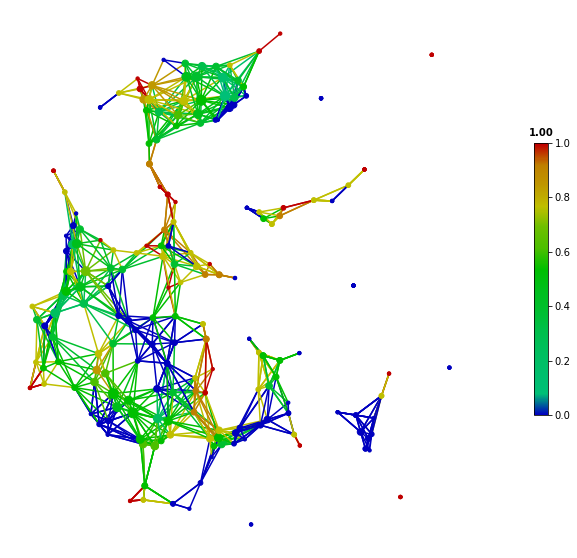

In [20]:
print(graph_PCA_BC.info())

graph_PCA_BC.show(color=color)